<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#descriptive-statistics" data-toc-modified-id="descriptive-statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>descriptive statistics</a></span><ul class="toc-item"><li><span><a href="#Mean" data-toc-modified-id="Mean-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Mean</a></span></li><li><span><a href="#standard-deviation" data-toc-modified-id="standard-deviation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>standard deviation</a></span></li><li><span><a href="#skewness" data-toc-modified-id="skewness-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>skewness</a></span></li><li><span><a href="#kurtosis" data-toc-modified-id="kurtosis-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>kurtosis</a></span></li></ul></li><li><span><a href="#Robust-statistics:-median" data-toc-modified-id="Robust-statistics:-median-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Robust statistics: median</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Mutual-Information-(MI)-between-Target-and-the-Predictors" data-toc-modified-id="Mutual-Information-(MI)-between-Target-and-the-Predictors-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Mutual Information (MI) between Target and the Predictors</a></span></li></ul></div>

# Data Description

This dataset contains house sale prices for King County,
which includes Seattle.
It includes homes sold between May 2014 and May 2015.

- Dependent features: 1 (price)
- Features : 19 home features
- Id:  1 house ID

Task: Try to estimate the price based on given features.
![](../data/raw/data_description.png)

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time

# random state
random_state=100
np.random.seed(random_state) # we need this in each cell
np.random.set_state=random_state

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 50)

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.16.4'), ('pandas', '0.25.0'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [2]:
import scipy
from scipy import stats

In [3]:
import IPython
from IPython.display import display

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Useful Scripts

In [5]:
def show_method_attributes(method, ncols=7):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    x = [i for i in dir(method) if i[0].islower()]
    x = [i for i in x if i not in 'os np pd sys time psycopg2'.split()]

    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

In [6]:
def json_dump_tofile(myjson,ofile,sort_keys=False):
    """Write json dictionary to a datafile.
    
    Usage:
    myjson = {'num': 5, my_list = [1,2,'apple']}
    json_dump_tofile(myjson, ofile)
    
    """
    import io
    import json

    with io.open(ofile, 'w', encoding='utf8') as fo:
        json_str = json.dumps(myjson,
                          indent=4,
                          sort_keys=sort_keys,
                          separators=(',', ': '),
                          ensure_ascii=False)
        fo.write(str(json_str))

# Load the data

In [7]:
df = pd.read_csv('../data/raw/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [60]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# descriptive statistics

In statistics we sometimes are interested in the momentes of the variables. First four degrees of moments of a random variable has names: `mean`, `variance`, `skewness`, `kurtosis` and other moments are simply called moment of order n.
![](../images/moments.png)
![](../images/gaussian_dist.png)
![](../images/gaussian_dist1.png)

In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
features_sqft = df.filter(like='sqft').columns
features_sqft

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Mean

In [26]:
def plot_statistics(df,features,statistic,color='b'):
    plt.figure(figsize=(12,4), dpi=80)
    sns.barplot(x=features, y= df[features].agg(statistic).sort_values(),color=color)
    plt.xlabel('Features')
    plt.ylabel(statistic.title())
    plt.title(statistic.title()+ ' for all features')
    plt.savefig(f'../reports/statistics/{statistic}.png',dpi=300)
    plt.xticks(rotation=90)
    plt.show()
    plt.close()

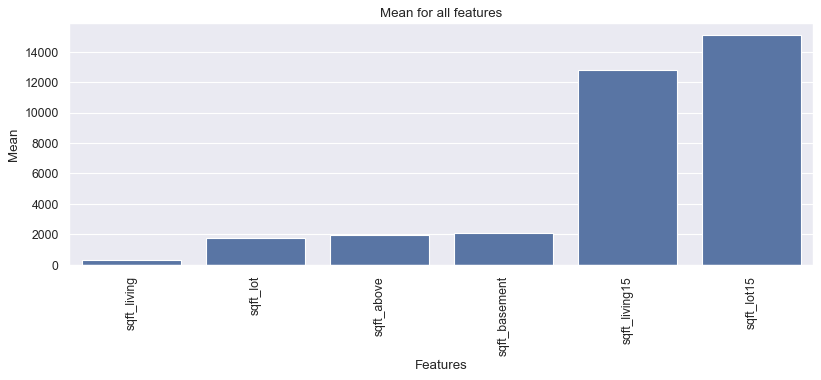

In [27]:
plot_statistics(df,features_sqft,'mean',color='b')
# mean is not zero, we need to normalize.

## standard deviation

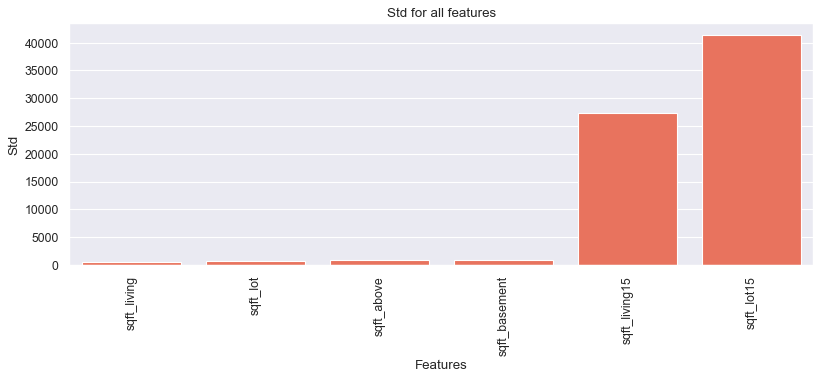

In [28]:
plot_statistics(df,features_sqft,'std',color='tomato')
# values are deviated, we need to normalize them.

## skewness
- The third order moment is called skewness.
- Normal distribution has skewness of 0.
- If the skewness is less than 0, it is negatively skewed and has tail on left side.
- If the skewness is greater than 0, it is positively skewed and has tail on right side.

![](images/skewness.png)

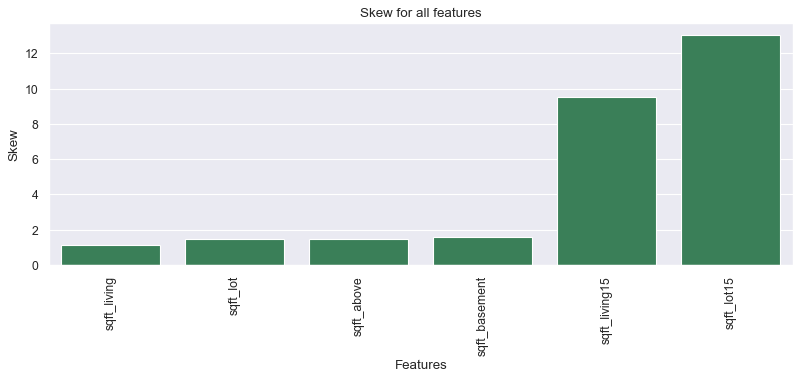

In [30]:
plot_statistics(df,features_sqft,'skew',color='seagreen')
# the features are skewed, we need to do boxcox transformation and
# also need to look at outliers.

In [32]:
feat = 'sqft_lot15'
df[feat].skew()

9.506743246764398

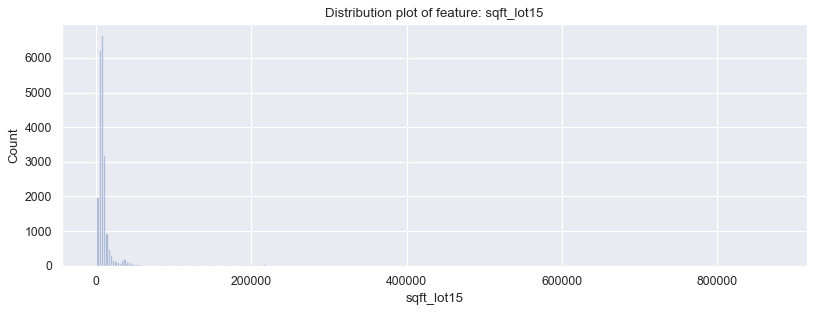

In [34]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df[feat], bins=300, kde=False)
plt.ylabel('Count')
plt.title(f'Distribution plot of feature: {feat}');

# almost all of data is centered around 0.

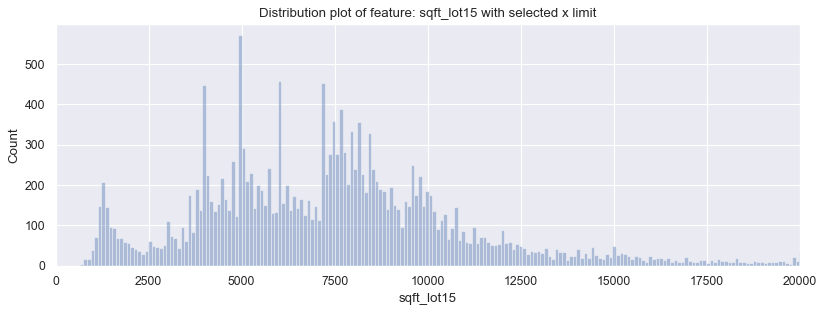

In [37]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df[feat], bins=9000, kde=False)
plt.ylabel('Count')
plt.title(f'Distribution plot of feature: {feat} with selected x limit')
plt.xlim(0,20_000)
plt.show()

# this does not look like gaussian.

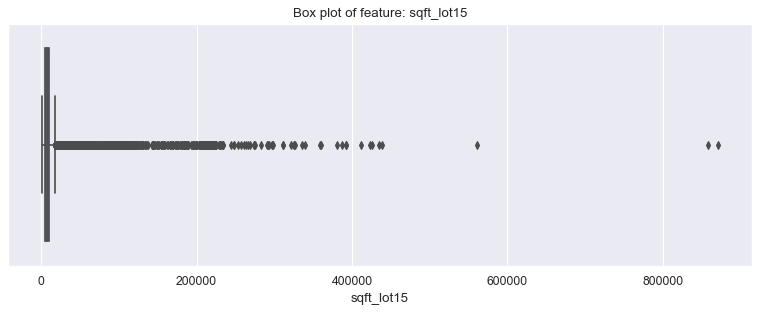

In [38]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(df[feat])
plt.title(f'Box plot of feature: {feat}')
plt.savefig(f'../reports/statistics/{feat}_boxplot.png',dpi=300)

# there are so many outliers
# boxplot is hard to read, we can plot kurtosis plot.

## kurtosis
- Kurtosis is related to the fourth moment. 
- For Normal distribution, kurtosis has a value of 3.
- If kurtosis > 3 it is called lepto-kurtic and it has tall peak.
- If kurtosis < 3 it is called platy-kurtic and it is flat.
- If kurtosis = 3 it is called meso-kurtic. Normal curve is meso-kurtic.

![](../images/kurtosis.png)

![](../images/moments.png)
![](../images/kurtosis.png)

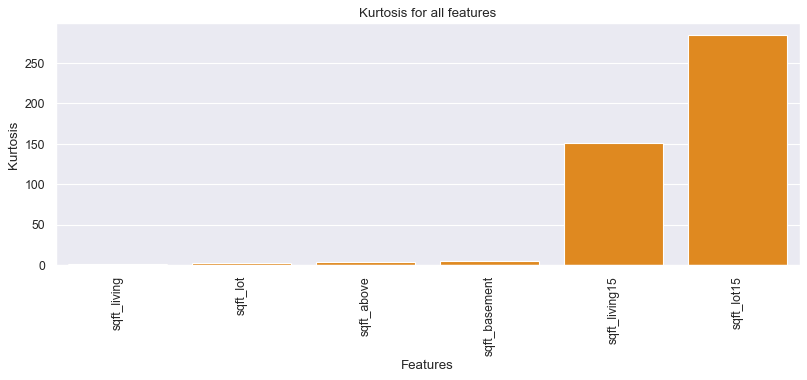

In [39]:
plot_statistics(df,features_sqft,'kurtosis',color='darkorange')

In [40]:
df[feat].kurtosis()

150.76311004626973

# Robust statistics: median

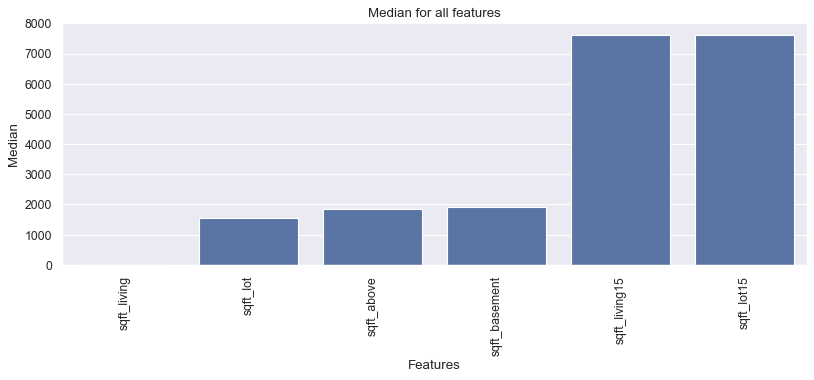

In [41]:
plot_statistics(df,features_sqft,'median',color='b')

# medians are not zero.

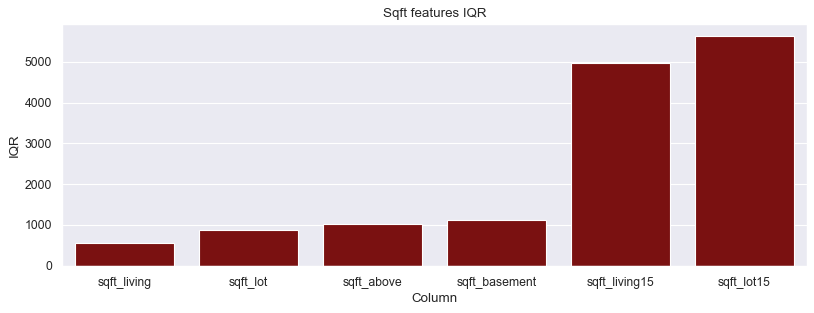

In [43]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=features_sqft, y= (df[features_sqft].quantile(0.75)
            - df[features_sqft].quantile(0.25)).sort_values(), color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('Sqft features IQR')
plt.savefig('../reports/statistics/iqr.png',dpi=300)

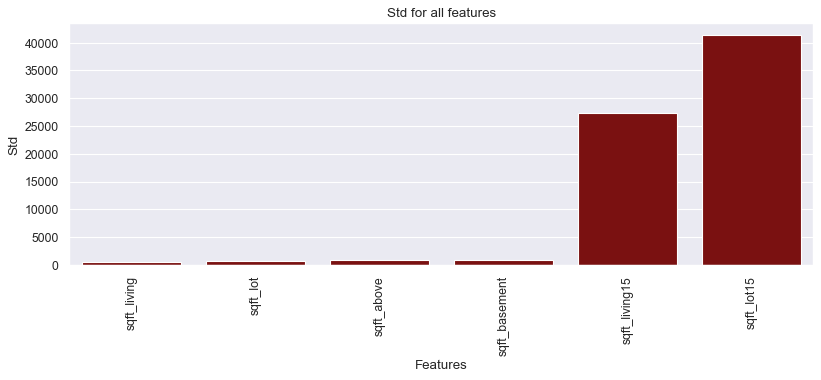

In [44]:
plot_statistics(df,features_sqft,'std',color='darkred')
# iqr and std does not look similar, we may have outliers.

# Outliers

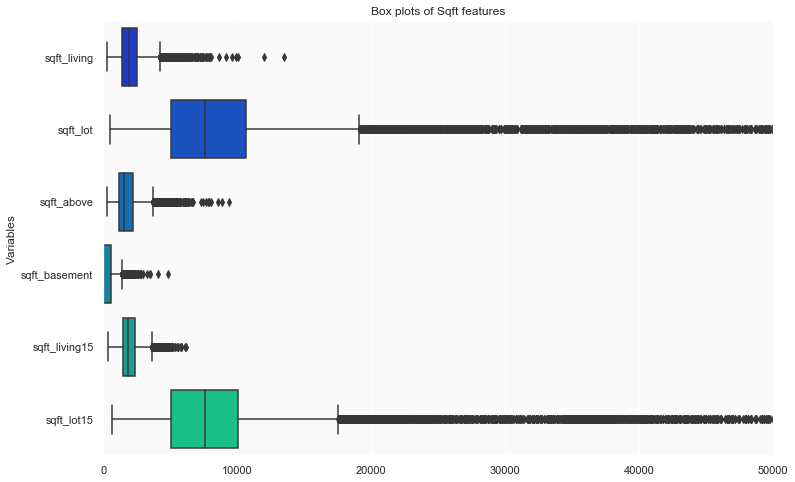

In [47]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(data = df[features_sqft], 
  orient = 'h', palette = 'winter')

ax.set(xlim=(-5,50_000))
ax.set_facecolor('#fafafa')
ax.set_title('Box plots of Sqft features')
ax.set_ylabel('Variables')
plt.savefig('../reports/statistics/boxplot_sqft_features.png',dpi=300)

# Mutual Information (MI) between Target and the Predictors

- Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables.

- It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

- Mutual Information is also known as information gain.

- Mutual information can be used as a criterion for feature selection and feature transformations in machine learning. It can be used to characterize both the relevance and redundancy of variables, such as the [minimum redundancy feature selection](https://www.wikiwand.com/en/Minimum_redundancy_feature_selection).

In [49]:
from sklearn.feature_selection import mutual_info_classif

In [55]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [57]:
all_features = df.columns.difference(['id','date','price'])
all_features

Index(['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'lat', 'long',
       'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15',
       'sqft_lot', 'sqft_lot15', 'view', 'waterfront', 'yr_built',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [58]:
%%time
target = 'price'

mutual_infos = pd.Series(data=mutual_info_classif(df[all_features], df[target],
                                                  discrete_features=False,
                                                  random_state=random_state),
                         index=all_features)

CPU times: user 21.3 s, sys: 2.75 s, total: 24.1 s
Wall time: 24.2 s


In [59]:
mutual_infos.sort_values(ascending=False).to_frame()

,0
floors,0.569917
grade,0.509087
lat,0.333617
sqft_living,0.324773
bedrooms,0.289373
bathrooms,0.284329
sqft_living15,0.248312
zipcode,0.233668
sqft_above,0.213384
condition,0.201436
